# DATA VISUALIZATION 
<hr style="height:5px;border-width:2;color:gray">

In [1]:
!pip install cufflinks
!pip install plotly.graph_objects

ERROR: Could not find a version that satisfies the requirement plotly.graph_objects
ERROR: No matching distribution found for plotly.graph_objects


In [2]:
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings

## Dataset used:
NIFTY50: https://www.kaggle.com/rohanrao/nifty50-stock-market-data (NIFTY50_all.csv, TCS.csv)

As data is based on stocks, it is already completely filled and cleaned.
Later on, for more accurate data I have directly pulled data through the yahoo finance API.

# NIFTY50 (NSEI)

In [3]:
nifty50 = pd.read_csv("NIFTY50_all.csv")
nifty50.rename(columns = {'Symbol':'Company'}, inplace = True)
nifty50 = nifty50.loc[(nifty50['Date'] >= '2019-05-01') & (nifty50['Date'] < '2021-04-30')].reset_index(drop=True)
nifty50

Date     Company Series  Prev Close    Open    High     Low  \
0      2019-05-02  ADANIPORTS     EQ      392.80  392.80  397.00  390.15   
1      2019-05-03  ADANIPORTS     EQ      395.30  393.00  398.40  385.05   
2      2019-05-06  ADANIPORTS     EQ      387.25  386.00  386.05  378.45   
3      2019-05-07  ADANIPORTS     EQ      379.80  381.00  383.95  370.10   
4      2019-05-08  ADANIPORTS     EQ      371.90  370.05  374.90  367.70   
...           ...         ...    ...         ...     ...     ...     ...   
24250  2021-04-23        ZEEL     EQ      192.30  192.00  193.00  187.00   
24251  2021-04-26        ZEEL     EQ      188.00  190.60  191.10  185.10   
24252  2021-04-27        ZEEL     EQ      186.40  188.00  192.95  186.80   
24253  2021-04-28        ZEEL     EQ      188.15  188.80  190.60  187.10   
24254  2021-04-29        ZEEL     EQ      189.10  190.80  191.65  186.00   

         Last   Close    VWAP    Volume      Turnover   Trades  \
0      395.30  395.30  394.75   2139442  8.445402e+13  32938.0   
1      387.30  387.25  393.56   1863548  7.334214e+13  30470.0   
2      380.00  379.80  381.39   1648057  6.285475e+13  46046.0   
3      370.40  371.90  377.07   1628805  6.141806e+13  41146.0   
4      369.50  369.80  371.65   1688110  6.273856e+13  66318.0   
...       ...     ...     ...       ...           ...      ...   
24250  188.00  188.00  190.04   8529439  1.620902e+14  60790.0   
24251  186.70  186.40  187.35   8542755  1.600451e+14  52374.0   
24252  188.80  188.15  189.41  14247767  2.698636e+14  73673.0   
24253  188.95  189.10  188.85   8429439  1.591917e+14  44056.0   
24254  186.60  186.55  187.44   9483009  1.777471e+14  60932.0   

       Deliverable Volume  %Deliverble  
0                960389.0       0.4489  
1                771097.0       0.4138  
2                752175.0       0.4564  
3                589474.0       0.3619  
4                614190.0       0.3638  
...                   ...          ...  
24250           2148300.0       0.2519  
24251           2340188.0       0.2739  
24252           5425957.0       0.3808  
24253           2413974.0       0.2864  
24254           2744472.0       0.2894  

[24255 rows x 15 columns]

In [4]:
nifty50.describe()

Prev Close          Open          High           Low          Last  \
count  24255.000000  24255.000000  24255.000000  24255.000000  24255.000000   
mean    2311.840771   2314.730408   2348.367592   2278.473447   2312.228149   
std     4346.630729   4351.606263   4415.376028   4283.537965   4346.697917   
min       60.000000     59.400000     62.900000     50.000000     60.200000   
25%      282.350000    283.000000    287.775000    277.425000    282.375000   
50%      716.850000    716.450000    728.000000    706.350000    717.200000   
75%     2217.475000   2220.050000   2249.000000   2191.025000   2220.000000   
max    31748.750000  31682.400000  32048.000000  31120.000000  31680.000000   

              Close          VWAP        Volume      Turnover        Trades  \
count  24255.000000  24255.000000  2.425500e+04  2.425500e+04  2.425500e+04   
mean    2312.407875   2313.496577  1.079941e+07  5.581154e+14  1.186841e+05   
std     4347.827653   4348.726673  1.694297e+07  7.329264e+14  1.088854e+05   
min       60.000000     61.000000  2.434000e+03  3.709032e+12  9.250000e+02   
25%      282.325000    282.735000  1.739396e+06  1.752615e+14  5.178850e+04   
50%      717.250000    716.430000  5.340153e+06  3.339836e+14  8.643800e+04   
75%     2217.975000   2220.370000  1.290418e+07  6.740966e+14  1.471525e+05   
max    31748.750000  31573.090000  3.905778e+08  3.564334e+16  1.643015e+06   

       Deliverable Volume   %Deliverble  
count        2.425500e+04  24255.000000  
mean         3.323990e+06      0.354684  
std          5.274895e+06      0.151386  
min          5.290000e+02      0.036800  
25%          5.508755e+05      0.234800  
50%          1.775170e+06      0.342600  
75%          4.155994e+06      0.463950  
max          2.325307e+08      0.896000

In [5]:
nifty50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24255 entries, 0 to 24254
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                24255 non-null  object 
 1   Company             24255 non-null  object 
 2   Series              24255 non-null  object 
 3   Prev Close          24255 non-null  float64
 4   Open                24255 non-null  float64
 5   High                24255 non-null  float64
 6   Low                 24255 non-null  float64
 7   Last                24255 non-null  float64
 8   Close               24255 non-null  float64
 9   VWAP                24255 non-null  float64
 10  Volume              24255 non-null  int64  
 11  Turnover            24255 non-null  float64
 12  Trades              24255 non-null  float64
 13  Deliverable Volume  24255 non-null  float64
 14  %Deliverble         24255 non-null  float64
dtypes: float64(11), int64(1), object(3)
memory usage: 2.8

In [6]:
nifty50_mean=nifty50.groupby("Company").mean()
nifty50_mean

Prev Close          Open          High           Low  \
Company                                                              
ADANIPORTS    408.922323    409.920202    416.702121    402.406768   
ASIANPAINT   1888.259394   1891.539697   1915.850101   1866.413939   
AXISBANK      617.349293    618.179192    627.960606    606.931111   
BAJAJ-AUTO   3050.599091   3054.016162   3096.088788   3011.445556   
BAJAJFINSV   7691.311919   7704.721919   7824.757576   7579.143939   
BAJFINANCE   3815.845960   3822.892121   3886.652222   3752.253131   
BHARTIARTL    468.092222    469.275657    476.810909    460.671818   
BPCL          406.253131    407.026263    414.503939    399.193131   
BRITANNIA    3246.515354   3253.681111   3294.034848   3210.194141   
CIPLA         620.363434    622.374646    631.294747    612.453333   
COALINDIA     165.941010    166.204545    168.450202    163.305960   
DRREDDY      3735.890707   3744.477172   3794.882323   3690.515152   
EICHERMOT   13106.635152  13090.430000  13320.044242  12849.144949   
GAIL          134.496970    134.519697    136.646364    132.045253   
GRASIM        810.630101    811.340404    825.697475    797.891717   
HCLTECH       831.660404    832.209798    843.076263    820.147778   
HDFC         2139.638384   2142.206970   2171.674040   2110.633535   
HDFCBANK     1436.236768   1436.938586   1451.644545   1417.794545   
HEROMOTOCO   2677.178990   2682.032828   2722.698384   2637.034242   
HINDALCO      200.434040    200.698889    204.530000    197.034646   
HINDUNILVR   2089.441818   2092.614040   2115.659495   2066.849495   
ICICIBANK     450.795354    451.442828    458.192222    444.175051   
INDUSINDBK    993.697677    995.777778   1015.260000    971.803333   
INFY          901.825051    902.749899    914.184949    892.376061   
IOC           107.965152    108.139596    109.644141    106.352626   
ITC           218.344646    218.883030    221.150202    215.758889   
JSWSTEEL      283.018990    283.279293    288.940404    278.045859   
KOTAKBANK    1554.407980   1556.251717   1576.873333   1531.573535   
LT           1213.172929   1215.860707   1230.936768   1198.466970   
M&M           600.512121    601.330101    611.413232    590.974545   
MARUTI       6627.326061   6636.607576   6728.615455   6533.156364   
NESTLEIND   15336.842727  15362.020707  15536.987778  15162.911515   
NTPC          106.181313    106.404141    107.874747    104.633636   
ONGC          106.630707    106.819394    108.490505    104.854747   
POWERGRID     188.516970    188.652929    191.386061    185.958586   
RELIANCE     1653.643434   1658.053737   1679.102626   1633.918586   
SBIN          274.613232    275.244949    279.513333    270.170303   
SHREECEM    21950.036162  21977.618889  22319.592424  21619.125657   
SUNPHARMA     478.354747    479.563737    487.153838    471.351818   
TATAMOTORS    163.748586    164.207172    167.829596    160.417778   
TATASTEEL     461.647374    462.463939    471.419192    453.775253   
TCS          2362.033232   2365.768384   2394.180404   2335.575758   
TECHM         762.107879    762.830707    773.595455    751.387677   
TITAN        1207.065051   1208.446768   1225.254949   1190.131818   
ULTRACEMCO   4511.907374   4520.104040   4584.582626   4453.375758   
UPL           552.302424    552.778283    562.321010    542.062121   
VEDL          141.754343    141.997778    144.770404    139.211717   
WIPRO         290.018889    290.668384    294.508586    286.736667   
ZEEL          240.030909    240.523636    246.578586    233.412121   

                    Last         Close          VWAP        Volume  \
Company                                                              
ADANIPORTS    409.592121    409.637374    409.864687  6.390561e+06   
ASIANPAINT   1890.934040   1890.583232   1890.737313  2.023830e+06   
AXISBANK      617.294747    617.253434    617.512343  2.026014e+07   
BAJAJ-AUTO   3052.396667   3052.321010   3054.392566  7.261001e+05   
BAJAJFINSV   7699.84646

### Turnover based on company (top50 NSE stocks)
<ul>
    <li>The line graph compares the turnover based on company.</li>
<ul>

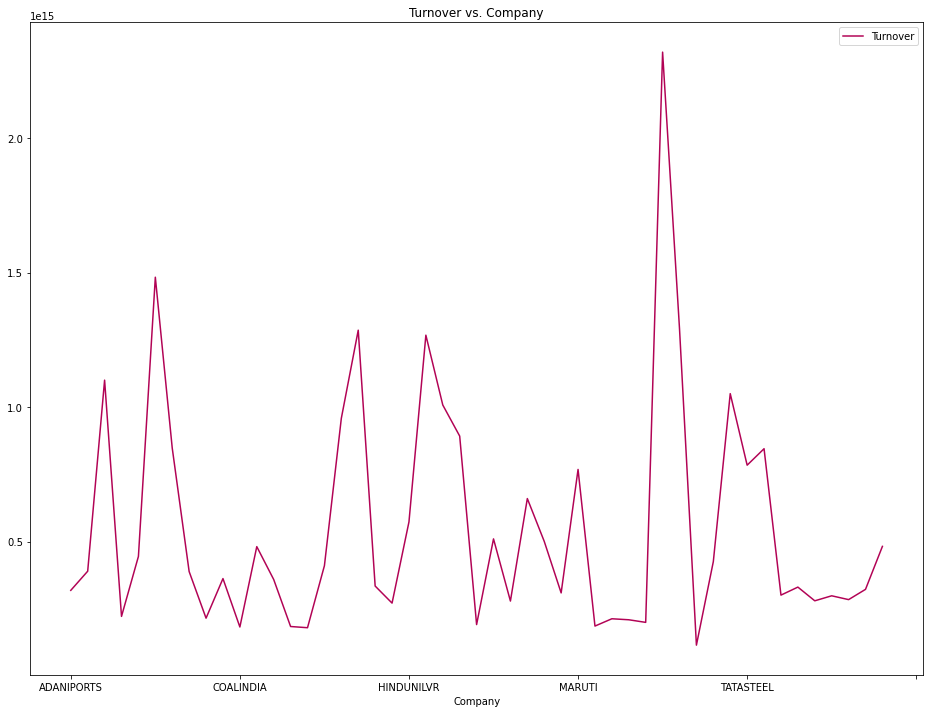

In [7]:
nifty50_mean.plot( y='Turnover',figsize=(16,12), color='#b20355')
plt.title("Turnover vs. Company")
plt.show()

<ul>
    <li>It can help you see certain turnover trends for companies in the particular period for example, Tata Steel had a constant turnover yet it fell during the start of pandemic but has been on a rise in recent times. </li>
    <li>As you'll see later turnover and trades have a good amount corelation and can tell us whether the company is generating a good amount of revenue or has a profitability chance and is worth investing in. </li> 
</ul>

In [8]:
nifty50_date = nifty50.groupby('Date').mean()
nifty50_date.head()

Prev Close         Open         High          Low         Last  \
Date                                                                          
2019-05-02  2318.418367  2307.292857  2342.304082  2275.621429  2315.868367   
2019-05-03  2316.047959  2314.394898  2333.760204  2292.992857  2303.451020   
2019-05-06  2305.342857  2288.947959  2311.225510  2271.130612  2288.587755   
2019-05-07  2290.164286  2300.717347  2318.648980  2271.492857  2290.195918   
2019-05-08  2286.407143  2284.531633  2296.182653  2249.471429  2269.084694   

                  Close         VWAP        Volume      Turnover  \
Date                                                               
2019-05-02  2316.047959  2315.739592  4.939101e+06  3.057361e+14   
2019-05-03  2305.342857  2312.945510  4.736263e+06  2.742635e+14   
2019-05-06  2290.164286  2291.889184  4.925700e+06  2.759376e+14   
2019-05-07  2286.407143  2293.567551  5.840264e+06  3.157200e+14   
2019-05-08  2267.512245  2271.789388  6.490173e+06  3.338837e+14   

                  Trades  Deliverable Volume  %Deliverble  
Date                                                       
2019-05-02  77692.693878        1.958005e+06     0.419518  
2019-05-03  75083.795918        1.832645e+06     0.423198  
2019-05-06  68778.836735        1.974236e+06     0.452798  
2019-05-07  78940.142857        2.072069e+06     0.445512  
2019-05-08  93080.367347        2.308605e+06     0.449669

### Turnover based on date and time(top50 NSE stocks)
<ul>
    <li>The line graph compares the turnover vs date.</li>
</ul>

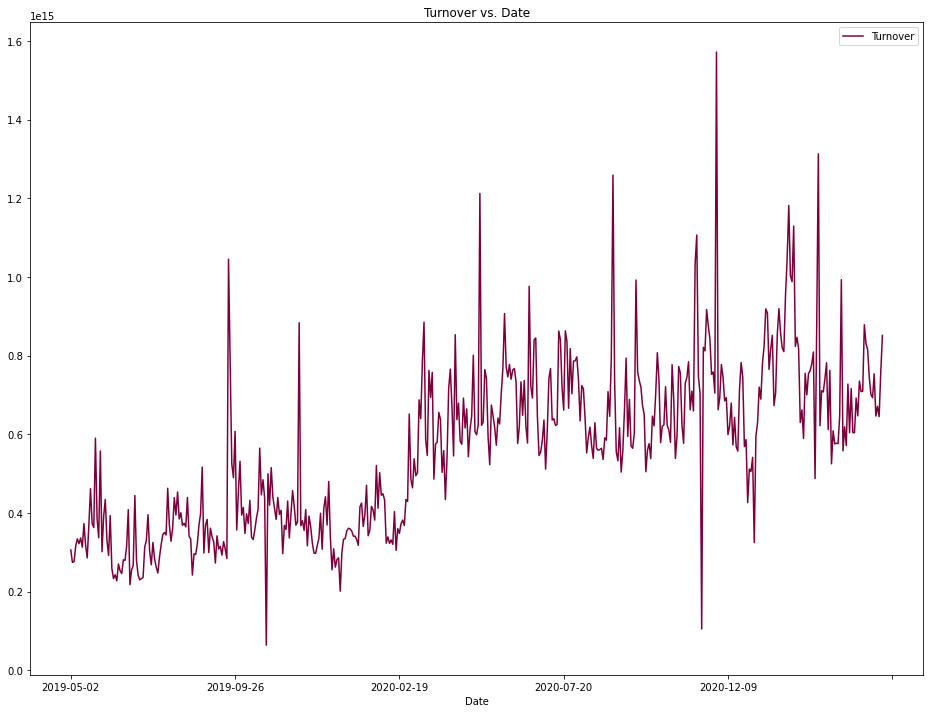

In [9]:
nifty50_date.plot(y='Turnover',figsize=(16,12), color='#7d003b')
plt.title("Turnover vs. Date")
plt.show()

<ul>
    <li>It gives an overall picture of the market in terms of revnue  and income. </li>
    <li>You can notice various trends through this, for example the turnover dipped during the first wave of pandemic and rise in cases in the months in between, as expected due to economy slowing down during those periods. </li> 
</ul>

In [10]:
nifty50_vwap = nifty50[['Date','VWAP']]
nifty50_vwap = nifty50_vwap.groupby('Date').mean()
nifty50_vwap

VWAP
Date                   
2019-05-02  2315.739592
2019-05-03  2312.945510
2019-05-06  2291.889184
2019-05-07  2293.567551
2019-05-08  2271.789388
...                 ...
2021-04-23  2526.937959
2021-04-26  2539.116122
2021-04-27  2547.185714
2021-04-28  2583.668163
2021-04-29  2601.644694

[495 rows x 1 columns]

## VWAP vs Date
<ul>
    <li>Volume weighted average price (VWAP) is a trading benchmark that tells us the average price a stock has traded at throughout the day.</li>
    <li>It provides insight into trends and value of the stock.</li>
</ul>

Text(0.5, 1.0, 'VWAP vs. Date')

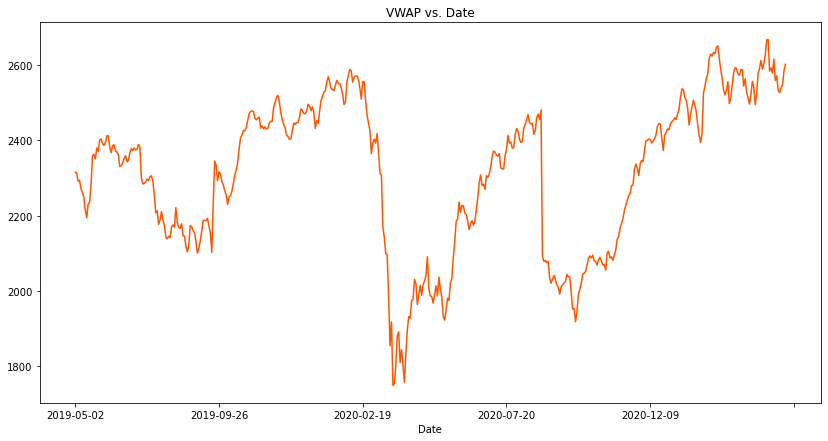

In [11]:
nifty50_vwap.VWAP.plot(figsize=(14, 7), color="#FD5602")
plt.title("VWAP vs. Date")

<ul>
    <li>Example of how a trend can be seen through this: March 2020, at the start of the pandemic, the Volitality/Fear Index was high due to the change in circumstances.The dip in VWAP shows how the market crashed back then, and even when it fell in OCtober 2020 when there was another spike in number of cases.</li>
<ul>

# Heatmap Correlation Analysis
<ul>
    <li>Closer to 1: Positive corelation</li>
    <li>Closer to 0: No obvious correlation</li>
    <li>Closer to -1: Negative Correlation</li>
</ul>

<AxesSubplot:title={'center':'Overall Correlation'}>

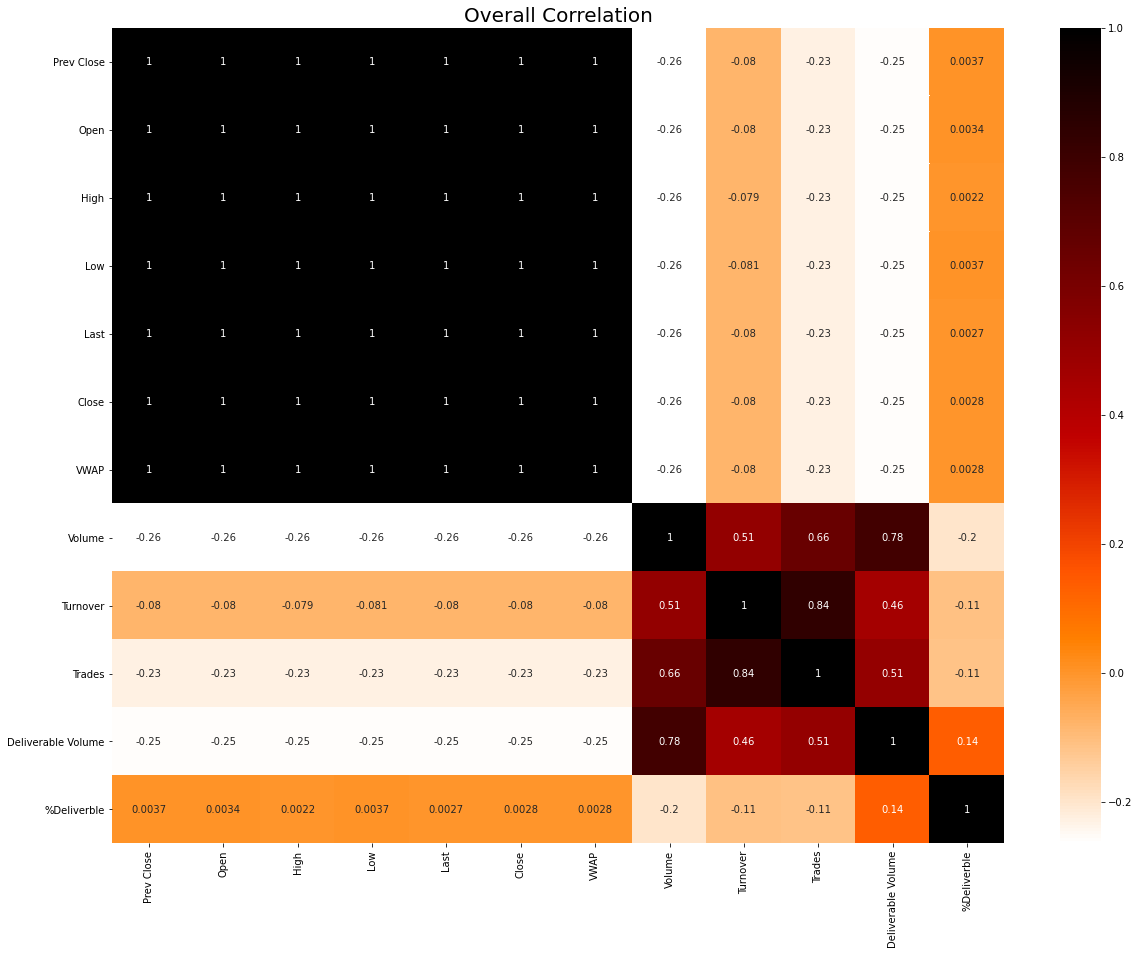

In [12]:
#heatmap for correlation btw mean values of nifty 
plt.subplots(figsize=(20,15))
plt.title('Overall Correlation', fontsize = 20)
sns.heatmap(nifty50.corr(),annot=True, cmap='gist_heat_r')

<AxesSubplot:>

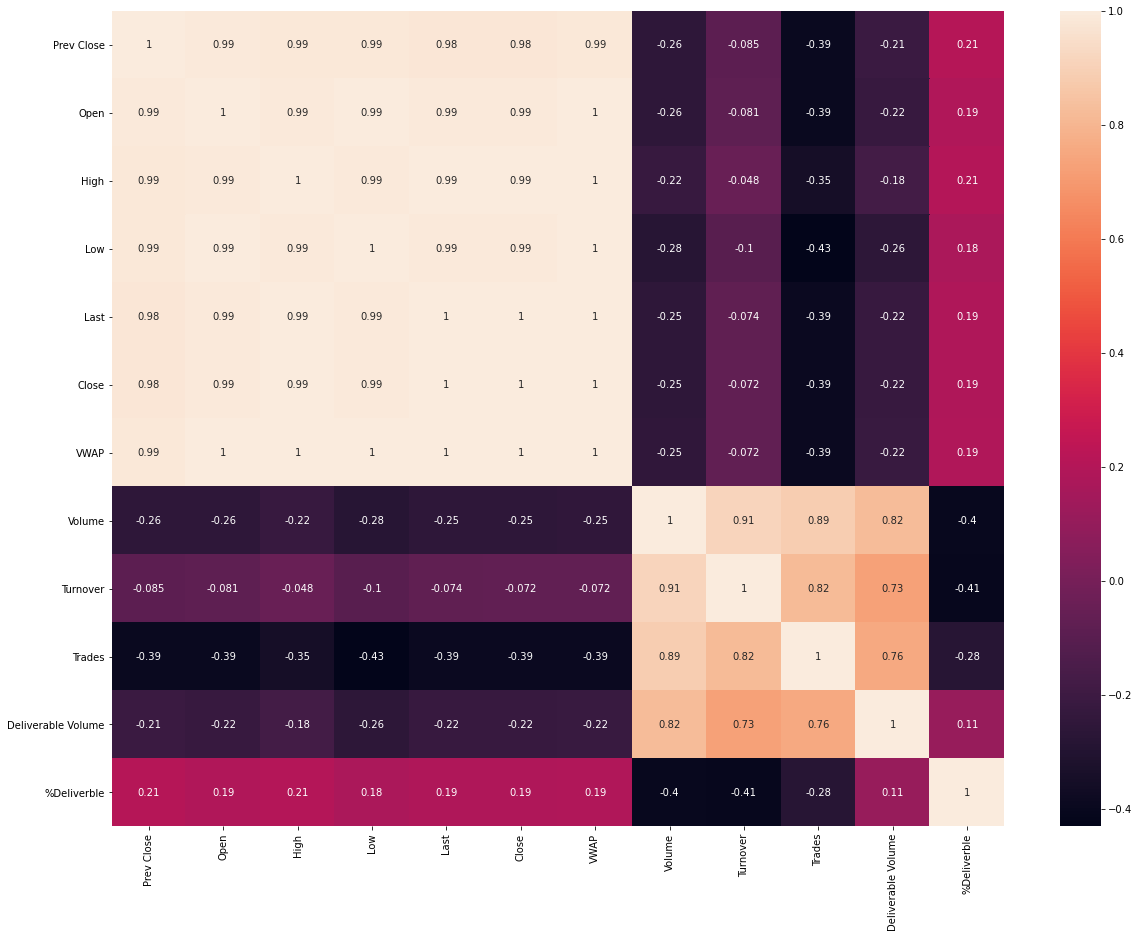

In [13]:
#heatmap for correlation btw mean values of nifty goruped by date
plt.subplots(figsize=(20,15))
sns.heatmap(nifty50_date.corr(),annot=True)

<ul>
    <li>The first graph is a heatmap for all nifty stocks, whereas the second one is a heatmap of the mean of NIFTY stocks by date. This is to show that there is not much of a difference in the realtion between different factors when compared to both heatmaps. NIFTY is considered an indicator of hwo the market is performing and this shows the same.</li>
    <li>Open, Close, High, Low, VWAP are highly corelated to each other as they are all valuations of stock price and do not seem to be correlated to any other factors</li>
    <li> Trades, Volume and Turnover show very high correlation values.</li>
<ul>

## Turnover, Trades and Volume

In [ ]:
sns.lmplot(data = nifty50, x = 'Turnover', y = 'Trades',lowess=True,scatter_kws={'alpha':0.2, 's':5,'color':'#FB607F'}, line_kws={'color':'#E01157'})
sns.lmplot(data = nifty50, x = 'Turnover', y = 'Volume',lowess=True,scatter_kws={'alpha':0.2, 's':5,'color':'#cd8de5'}, line_kws={'color':'#a86cc1'})
plt.show()

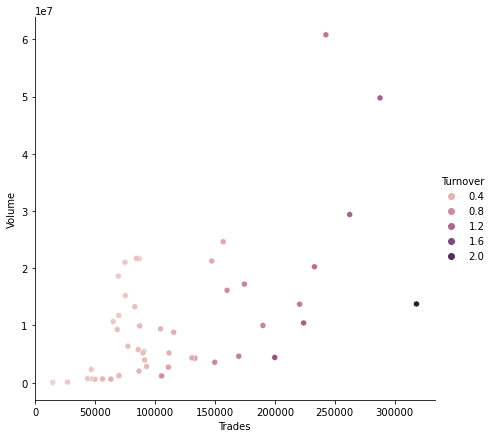

In [14]:
#Trades vs. Volume w.r.t Turnover
Turnover = nifty50_mean.Turnover
cmap = sns.cubehelix_palette(rot=-0.75, as_cmap=True)

sns.relplot(x="Trades", y="Volume", hue=Turnover/100000, sizes=(40, 400), alpha=1, height=6, data=nifty50_mean)
plt.show()

<ul>
    <li>We observe an almost linear trend between turnover and volume as well as turnover and trades for a single stock too.</li>
    <li>This is due to the fact that turnover would depend on the no of trades that happen. Of course, an increase in volume traded would mean the amount of shares traded that would increase a company's turnover. </li>
    <li> The third graph compares Trades vs. Volume w.r.t to Turnover. We see that a comparitively higher volume is observed with a higher no of trades, and the turnover in such a case is also high, further proving the correlation between the three.</li>

# Tech Stocks with special emphasis on TCS

In [15]:
TCS = pd.read_csv("TCS.csv")
TCS.rename(columns = {'Symbol':'Company'}, inplace = True)
TCS = TCS.loc[(TCS['Date'] >= '2019-05-01') & (TCS['Date'] < '2021-04-30')].reset_index(drop=True) # for 2 years of data
TCS

Date Company Series  Prev Close     Open     High      Low  \
0    2019-05-02     TCS     EQ     2260.35  2255.00  2259.40  2211.10   
1    2019-05-03     TCS     EQ     2215.40  2185.00  2186.05  2125.00   
2    2019-05-06     TCS     EQ     2132.00  2110.00  2165.00  2108.50   
3    2019-05-07     TCS     EQ     2157.85  2160.05  2184.35  2138.80   
4    2019-05-08     TCS     EQ     2151.95  2151.00  2168.00  2130.40   
..          ...     ...    ...         ...      ...      ...      ...   
490  2021-04-23     TCS     EQ     3118.80  3105.00  3119.00  3091.05   
491  2021-04-26     TCS     EQ     3109.50  3102.05  3153.00  3088.05   
492  2021-04-27     TCS     EQ     3100.80  3106.00  3136.10  3103.00   
493  2021-04-28     TCS     EQ     3132.00  3149.95  3151.00  3112.00   
494  2021-04-29     TCS     EQ     3124.10  3145.60  3157.35  3105.50   

        Last    Close     VWAP   Volume      Turnover    Trades  \
0    2214.70  2215.40  2227.88  2457699  5.475449e+14  106215.0   
1    2137.00  2132.00  2153.00  3780886  8.140257e+14  188561.0   
2    2155.20  2157.85  2150.11  2891422  6.216881e+14  109314.0   
3    2154.00  2151.95  2163.53  2201698  4.763441e+14   86096.0   
4    2156.00  2152.85  2151.85  1824895  3.926902e+14   77713.0   
..       ...      ...      ...      ...           ...       ...   
490  3110.20  3109.50  3105.86  1615309  5.016930e+14   93127.0   
491  3100.05  3100.80  3122.35  2490260  7.775465e+14   87012.0   
492  3132.75  3132.00  3122.18  1471417  4.594036e+14   97077.0   
493  3123.00  3124.10  3125.72  1639037  5.123176e+14   76017.0   
494  3114.45  3115.25  3130.83  1621395  5.076306e+14   98275.0   

     Deliverable Volume  %Deliverble  
0               1064368       0.4331  
1               1641641       0.4342  
2               1224571       0.4235  
3                975603       0.4431  
4                781526       0.4283  
..                  ...          ...  
490              772358       0.4781  
491             1345353       0.5402  
492              849767       0.5775  
493              847762       0.5172  
494              837567       0.5166  

[495 rows x 15 columns]

# Candlestick Graph
It shows the price movement of a stock over a period of time. Various trends seen on this graph help traders decide when to buy or sell the stock.

In [16]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=TCS['Date'],
                       open=TCS['Open'], high=TCS['High'],
                       low=TCS['Low'], close=TCS['Close'])]
               )
fig.show()

<ul>
    <li>The graph helps us decide when to sell or buy the stock</li>
    <li>For Example: The best time to buy the TCS stock in Fall 2020 would be the dip noticed near October 2020. The lowest point is touched by a bearish candle (red) but in the next two days the price does not drop lower the the lowest price of that candle indicating a possible rising trend from then on.</li>
</ul>

### MACD Line Graph
Used to identify when bullish or bearish momentum is high.

In [17]:
start=dt.datetime(2019, 5, 1)
tickers  = ['TCS']
ohlcv = pdr.get_data_yahoo(tickers[0],start=start)
def MACD(Df,a,b,c):
    df = Df.copy()
    df['MA_Fast'] = df['Adj Close'].ewm(span = a , min_periods = a).mean()
    df['MA_Slow'] = df['Adj Close'].ewm(span = b , min_periods = b).mean()
    df['MACD'] = df['MA_Fast'] - df['MA_Slow']
    df['Signal'] = df['MACD'].ewm(span = c ,min_periods = c).mean()
    df.dropna(inplace=True)
    return df

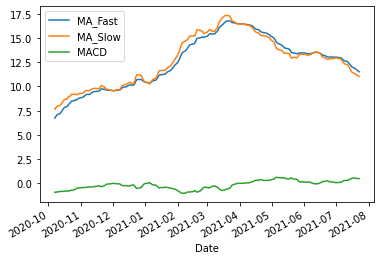

In [18]:
MACD(ohlcv,20,10,10).iloc[-200:,[6,7,8]].plot()
plt.show()

<ul>
    <li>In MACD a divergence tends to mean reversal in the trend of the stock. </li>
    <li>When the MACD falls below the signal line, it is a bearish signal that indicates that it may be time to sell.</li>
    <li>When MACD rises above signal line, it is a bullish signal the indicates it might be time to buy as stock might gain upward momentum.</li>
    <li>Crossover confirm bearish or bullish signals, example in April 2021.</li>
</ul>

# Technical Indicators

In [19]:
#library to easily show candlestick, macd, rsi, bollinger, sma etc
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode

#to use in offline mode
cf.go_offline()
init_notebook_mode()

#To graph all important technical indictors at once to notice trends
tcs=cf.QuantFig(ohlcv, title='TCS stock technical indicators')
tcs.add_sma([10,50],width=2,color=['green','lightgreen'])
tcs.add_rsi(periods=14, color='java')
tcs.add_volume()
tcs.add_macd()
tcs.iplot()

<ul>
    <li>The most commonly used Technical Indicators to analyse market trends are RSI, SMA, Bollinger Bands and MACD.</li>
    <li>Using all of these together ensures a better prediction of whether to buy or sell shares.</li>
    <li>A simple rule using RSI is to sell when the value is above 70 and buy when the value is below 30.</li>
    <li> Each indicator has its own false positives and negatives and hence using it all together helps reduce chances of that. For example: Around March/April 2020 RSI drops below 30. MACD falls below signal line as well. THus the indicators together with the candlestick trend indicate a good time to buy and a possible upward reversal due to crossover which does happen.</li>
</ul>  

# Bollinger Bands
The bands are plotted at a standard deviation level above and below a simple moving average of the price of stock. Bollinger bands help determine whether prices are high or low on a relative basis. 

In [20]:
tcs_copy=cf.QuantFig(ohlcv, title='TCS stock')
tcs_copy.add_bollinger_bands(periods=20, boll_std=2,colors=['orange','grey'],fill=True) #std = no of standard deviations
tcs_copy.iplot()

<ul>
    <li>Bollinger Bands are a technical indicator that are better used to gauge trends.</li>
    <li>You can notice that during downtrends, the graph is close to the lower Bollinger Band and during upward trends it's close to the upper Bollinger Band.</li>
    <li>It helps in using the squeeze strategy after an aggresie price movemnt. For example: there is a sideway "squeeze" trend near March/April 2020, which is the perfect time to buy the stock as it indicates a change in direction of trend after, which as observed does turn to upward movement.
</ul>

## Percentage Change from Day-to-Day

In [21]:
TCS['Day_Perc_Change'] = TCS['Close'].pct_change()*100
TCS.head()

Date Company Series  Prev Close     Open     High     Low    Last  \
0  2019-05-02     TCS     EQ     2260.35  2255.00  2259.40  2211.1  2214.7   
1  2019-05-03     TCS     EQ     2215.40  2185.00  2186.05  2125.0  2137.0   
2  2019-05-06     TCS     EQ     2132.00  2110.00  2165.00  2108.5  2155.2   
3  2019-05-07     TCS     EQ     2157.85  2160.05  2184.35  2138.8  2154.0   
4  2019-05-08     TCS     EQ     2151.95  2151.00  2168.00  2130.4  2156.0   

     Close     VWAP   Volume      Turnover    Trades  Deliverable Volume  \
0  2215.40  2227.88  2457699  5.475449e+14  106215.0             1064368   
1  2132.00  2153.00  3780886  8.140257e+14  188561.0             1641641   
2  2157.85  2150.11  2891422  6.216881e+14  109314.0             1224571   
3  2151.95  2163.53  2201698  4.763441e+14   86096.0              975603   
4  2152.85  2151.85  1824895  3.926902e+14   77713.0              781526   

   %Deliverble  Day_Perc_Change  
0       0.4331              NaN  
1       0.4342        -3.764557  
2       0.4235         1.212477  
3       0.4431        -0.273420  
4       0.4283         0.041823

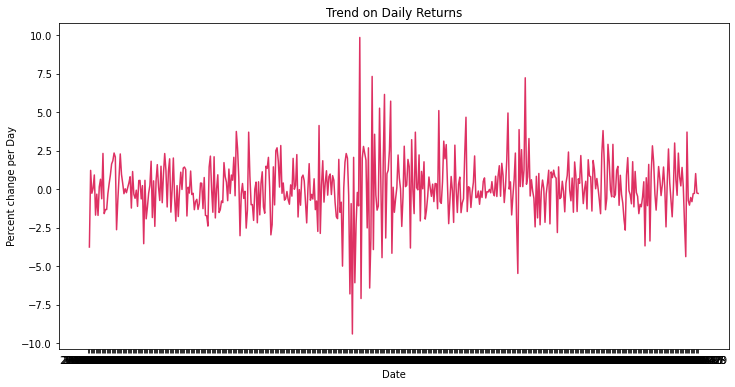

In [22]:
plt.figure(figsize=(12, 6))
plt.xlabel("Date")
plt.ylabel("Percent change per Day")
plt.title("Trend on Daily Returns")
plt.plot('Date', 'Day_Perc_Change', data=TCS, color="#DE3163")
plt.show()

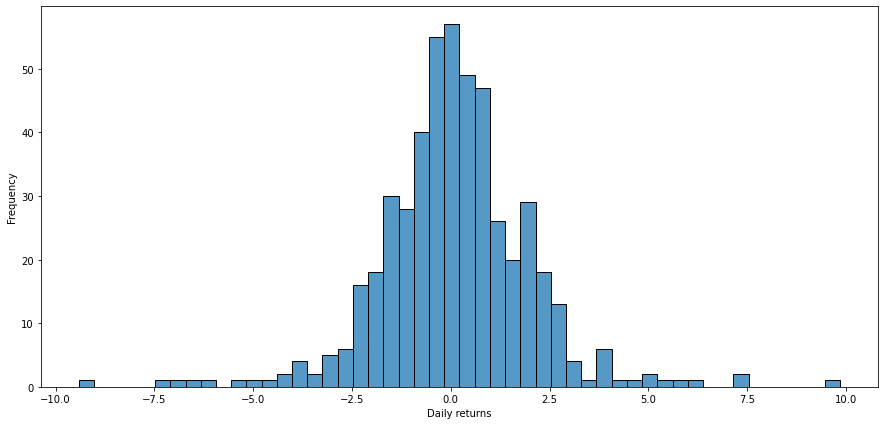

count    494.000000
mean       0.086982
std        1.896701
min       -9.410350
25%       -0.879463
50%        0.037800
75%        1.010800
max        9.845082
Name: Day_Perc_Change, dtype: float64

In [23]:
fig, ax = plt.subplots(figsize=(15,7))
sns.histplot(TCS['Day_Perc_Change'],bins = 50,ax=ax) 
plt.xlabel('Daily returns')
plt.ylabel('Frequency')
plt.show()

#stats
TCS.Day_Perc_Change.describe()

<ul>
    <li>The daily return are almost centered around the origin with the mean being 0.2 in the past year.</li>
    <li>With the mean daily return less than 1%, we can conclude TCS stock has been less volatile during this period.</li>
    <li>There doesn't seem to have been any obvious bull run though there was a slight bear drop of sorts in September/October 2020</li>
<ul>

# Daily Volumes and Returns
Daily Volume in red and Daily Returns in blue

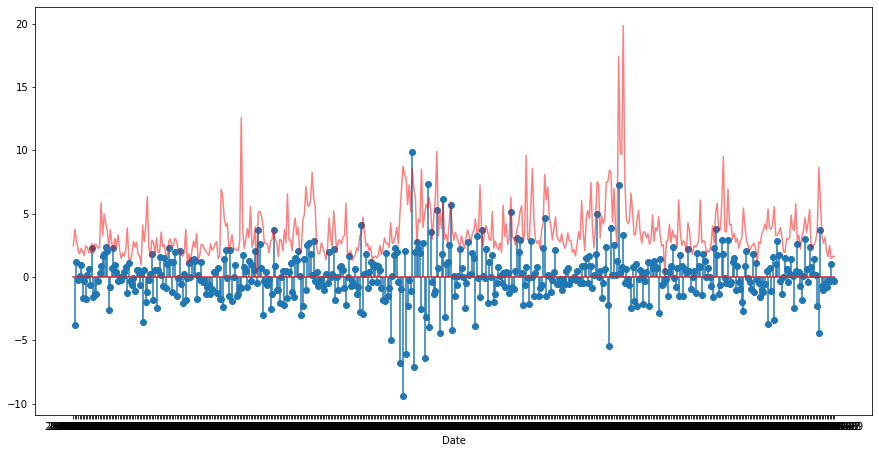

In [24]:
plt.subplots(figsize=(20,15))
plt.stem(TCS['Date'], TCS['Day_Perc_Change'])
plt.xlabel("Date")
(TCS['Volume']/1000000).plot(figsize = (15, 7.5), color = 'red', alpha = 0.5) #Daily volume of trade has been reduced in scale to match with the daily return scale
plt.show()

<ul>
    <li>Whenever volume of shares traded is high, right after there is a comparitively high rise or fall in price of stock.
</li>
    <li>This tells us that if an unusually high volume of shares is traded, it is expected that there will be a substantial change in the market in either direction.</li>
    <li>Volume of shares along with trend of price of stock together are a general indicator of confidence of traders and investors in the stock of that Company.</li>
</ul>

## Turnover, Trades and Volume 

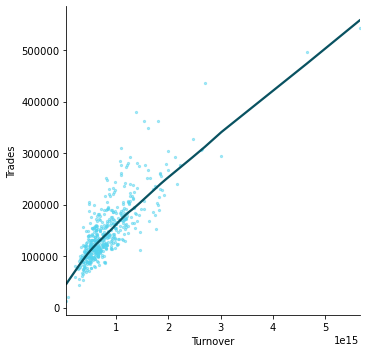

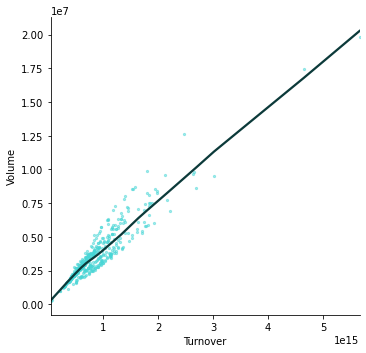

In [25]:
sns.lmplot(data = TCS, x = 'Turnover', y = 'Trades',lowess=True,scatter_kws={'alpha':0.5, 's':5,'color':'#52d3ee'}, line_kws={'color':'#095261'})
sns.lmplot(data = TCS, x = 'Turnover', y = 'Volume',lowess=True,scatter_kws={'alpha':0.5, 's':5,'color':'#47d6d6'}, line_kws={'color':'#0c3a3a'})
plt.show()

<ul>
    <li>Like we saw in for NIFTY stocks, similarly we observe a similar, almost linear trend between turnover and volume as well as turnover and trades for a single stock too.</li>
    <li>This is due to the fact that turnover would depend on the no of trades that happen. Of course, an increase in volume traded would mean the amount of shares traded that would increase a company's turnover. </li>

## Correlation Analysis of any two tech stocks (Pairplot and Jointplot)
Whenever your buld a profile, you try to diversify it, in which case the correlation between any two stocks in your portfolio should be close to 0. The reason being if they are highly correlated and the price of one falls, so will the other and hence you would suffer major loses as a trader.

### Pairplot

In [26]:
#pulling data from yahoo finance through webreader
start=dt.datetime(2019, 5, 1)
tech = pdr.DataReader(['TCS.NS','INFY.NS','HCLTECH.NS','WIPRO.NS','^NSEI'],'yahoo',start = start)['Adj Close']
#NSEI = NIFTY50
tech.dropna(inplace = True, axis = 0)
tech
#using csv to concatenate (pd.concat) and extract data is another method. 

Symbols          TCS.NS      INFY.NS   HCLTECH.NS    WIPRO.NS         ^NSEI
Date                                                                       
2019-05-02  2090.411133   680.066895   560.531311  291.813171  11724.750000
2019-05-03  2011.716675   673.366760   552.317017  289.080414  11712.250000
2019-05-06  2036.108276   668.527832   548.934631  289.030701  11598.250000
2019-05-07  2030.541260   674.250854   546.856873  292.011963  11497.900391
2019-05-08  2031.390259   669.411865   547.267517  289.030701  11359.450195
...                 ...          ...          ...         ...           ...
2021-07-16  3194.800049  1555.449951  1005.000000  577.750000  15923.400391
2021-07-19  3184.600098  1541.699951  1000.200012  573.799988  15752.400391
2021-07-20  3205.800049  1550.050049   977.200012  568.099976  15632.099609
2021-07-22  3216.350098  1590.199951   978.599976  584.200012  15824.049805
2021-07-23  3212.850098  1590.449951   994.000000  599.150024  15856.049805

[550 rows x 5 columns]

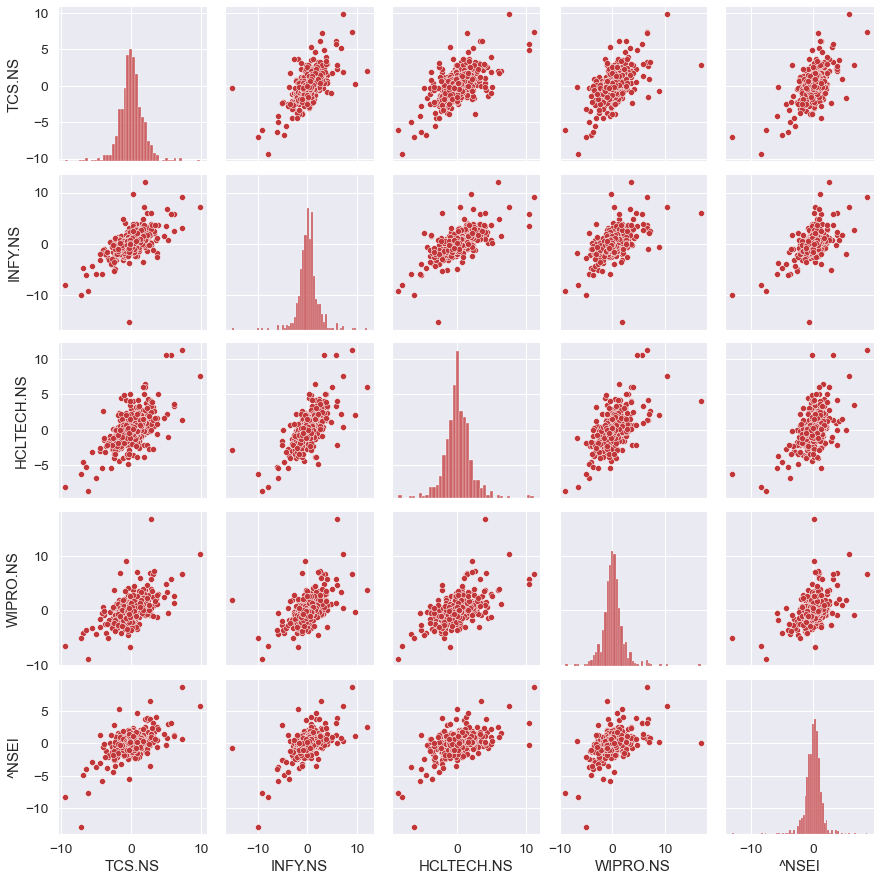

In [27]:
# store daily returns of all above stocks(daily percentage change)
returns = tech.pct_change()*100
returns.dropna(inplace = True, how = 'any', axis = 0)

# plotting pairplot  
sns.set_theme(style="darkgrid",font_scale = 1.25, palette="RdBu")
sns.pairplot(returns)
plt.show()

<ul>
    <li>TCS, INFY, Wipro, HCLTech stocks cannot be included in a portfolio as no two stocks show any significant correlation. This is further proven throught the next joint plots.</li>
</ul>

### Jointplot
Jointplot helps us correlate the daily returns on any two stocks.

[[1.         0.97885929]
 [0.97885929 1.        ]]


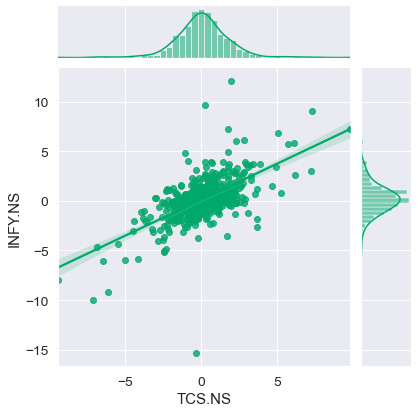

In [28]:
#INFY vs TCS
sns.jointplot(x='TCS.NS',y='INFY.NS', data=returns, kind='reg',color="#00A86B")
#Pearson Correlation Coefficient
rho = np.corrcoef(tech['TCS.NS'],tech['INFY.NS'])
print(rho)

[[1.         0.91503186]
 [0.91503186 1.        ]]


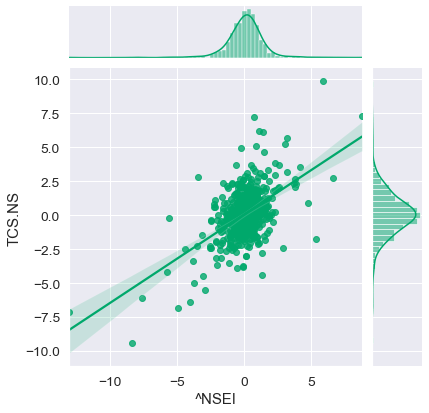

In [29]:
#Relation of TCS (biggest tech company by stocks)on NIFTY
sns.jointplot(x='^NSEI',y='TCS.NS', data=returns, kind='reg',color="#00A86B")
rho2=np.corrcoef(tech['^NSEI'],tech['TCS.NS'])
print(rho2)

<ul>
    <li>The first plot is between the two leading tech companies TCS and INFY.The graph itself seems to show a high dependence of the two stocks on each other. The pearson's co-efficient number (0.97886) shows a strong positive correlation between the two. Thus, while diversifying our portfolio in a way to ensure less risk of loss, one should pick one stock from a sector, as stocks on a sector are highly related to each other and the current happening and news of that sector </li>
    <li>The second graph between NSEI and TCS also show a strong correlation (0.915). This shows that leading tech stocks highly impact the overall market as a drop in NIFTY is a drop in the market as a whole. </li> 
</ul>

# Volatilty
Volatilty is a statistical measurement of the returns on a stock over a period of time. A stock that is less volatile is more stable and vice versa.

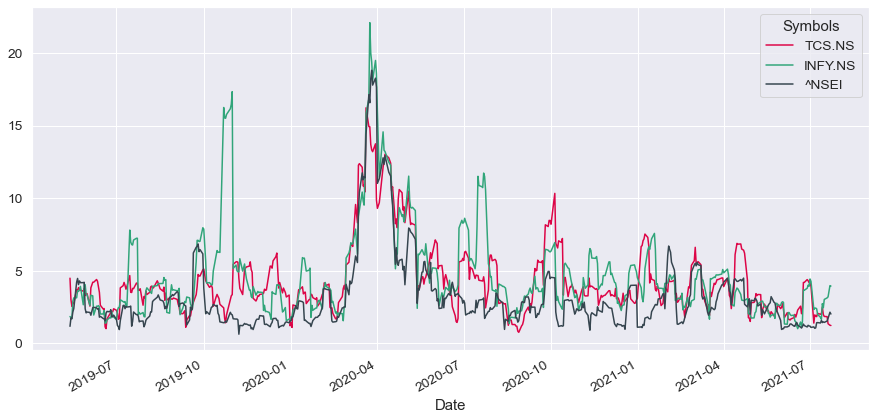

In [30]:
#volatility comparision
volatility = returns[['TCS.NS','INFY.NS','^NSEI']].rolling(7).std()*np.sqrt(7) #taken for 7 days
volatility.plot(figsize = (15, 7), color=["#dd0547","#31a57a","#36454F"])
plt.show()

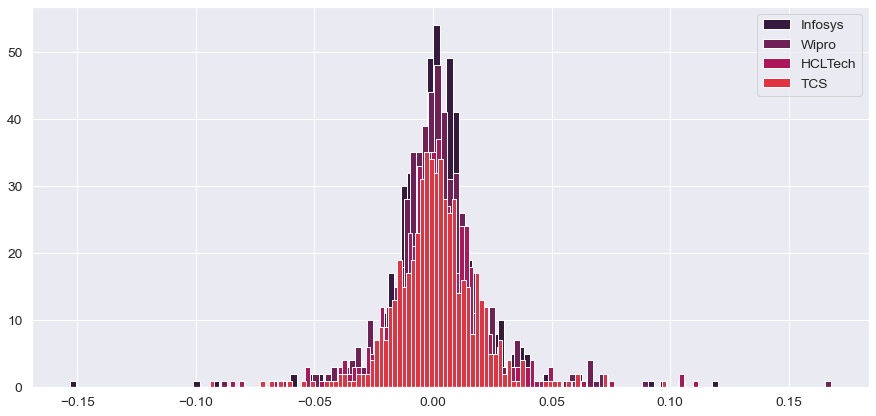

In [31]:
#another way to show volatility
sns.set_theme(style="darkgrid",font_scale = 1.25, palette="rocket")
tech['tcs_returns'] = (tech['TCS.NS']/tech['TCS.NS'].shift(1)) -1
tech['infy_returns'] = (tech['INFY.NS']/tech['INFY.NS'].shift(1))-1
tech['wipro_returns'] = (tech['WIPRO.NS']/tech['WIPRO.NS'].shift(1)) - 1
tech['hcl_returns'] = (tech['HCLTECH.NS']/tech['HCLTECH.NS'].shift(1)) - 1

tech['infy_returns'].hist(bins = 100, label = 'Infosys', alpha = 1,figsize = (15,7))
tech['wipro_returns'].hist(bins = 100, label = 'Wipro', alpha = 1)
tech['hcl_returns'].hist(bins = 100, label = 'HCLTech', alpha = 1)
tech['tcs_returns'] .hist(bins = 100, label = 'TCS', alpha = 1)
plt.legend()
plt.show()

 The two volatility graphs between major tech tocks tell us :
<ul>
    <li>The line graph compares the volatility in comaprision to NIFTY (top 50 stocks). NIFTY as expected will be least volatile (greater volume due to number ofstocks included) and is hence taken as a reference because NIFTY indicates marrket conditions. Between Infosys and TCS, it is clear that TCS is less volatile (lower peaks) and more stable in terms of stock price.</li>
    <li> This makes Infosys a better stock for intraday trading due to higher possible increase within a day, hwoever TCS is a more stable stock fro long term investment.</li>
    <li>Second graph (histogram) compares the volatility of all 4 major tech stocks in India. Infosys is most volatile as it is the widest. </li>
    <li>Both graphs are calculated using the returns as volatility is a measurement of returns. Depending on the investment you would check the volatility over a period of time, for ex: intraday traders would check the volatility over a day whereas a long-term investor would look at it over a period of few months or years. </li> 
</ul>